# Finding Heavy Traffic Indicators
 - The aim of this project is identify propably causes of traffice on the west bound I-94 interstate
 - "I-94 Interstate highway" data set is used in this project
 - The data set used in this project was made available by John Hague 

In [6]:
# Import Cell; use this cell to import all function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read Cell; use this cell to read in all data set
traffic_info = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [5]:
traffic_info.info()
traffic_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


# Analyzing Traffic Volume

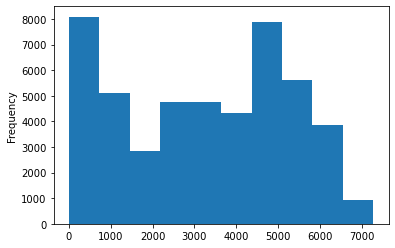

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
traffic_info['traffic_volume'].plot.hist()
plt.show()
traffic_info['traffic_volume'].describe()

On average about 3200 cars pass that highway in the time period. Seems there is a high frequency of ~500 and 5500 signaling a time dependency

# Comparing Daytime to Nighttime

split the information into day time and night time traffic information

In [20]:
traffic_info['date_time']= pd.to_datetime(traffic_info['date_time'])
traffic_day = traffic_info.copy()[(traffic_info['date_time'].dt.hour >=7) &(traffic_info['date_time'].dt.hour <19)]
traffic_night = traffic_info.copy()[(traffic_info['date_time'].dt.hour >=19) | (traffic_info['date_time'].dt.hour < 7)]
print(traffic_day.shape)
print(traffic_night.shape)

(23877, 9)
(24327, 9)


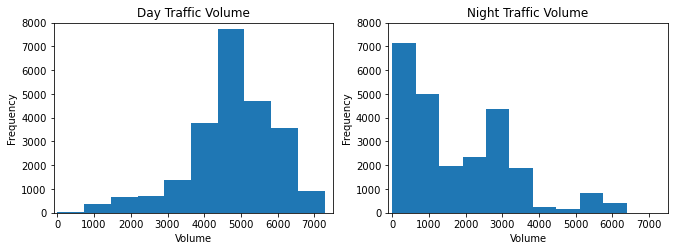

In [30]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(traffic_day['traffic_volume'])
plt.xlim([-100,7500])
plt.ylim([0,8000])
plt.title('Day Traffic Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(traffic_night['traffic_volume'])
plt.xlim([-100,7500])
plt.ylim([0,8000])
plt.title('Night Traffic Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.show()

In [33]:
traffic_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [34]:
traffic_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The day time data shows a left skew indicating high volume of cars passing the station during the day. 75% of the time, more that 4252 cars pass the station. On average about 4762 cars pass during the day. 

In comparison, during the night time, an average of only about 1785 pass the station. The histogram is right skewed confirming the average value seen. Only about 25% of the time are the number of cars that pass during the night is above 2819.

It would be interesting to see what the data looks like on an hourly basis

In [57]:
traffic_day.head()
traffic_day['hour']=traffic_day['date_time'].dt.hour
traffic_day['day']=traffic_day['date_time'].dt.day
traffic_day['month']=traffic_day['date_time'].dt.month
traffic_day['year']=traffic_day['date_time'].dt.year
traffic_day['dayofweek']=traffic_day['date_time'].dt.dayofweek
traffic_day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day,month,year,dayofweek
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,2,10,2012,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,2,10,2012,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,2,10,2012,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,2,10,2012,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,2,10,2012,1


In [53]:
month_average = traffic_day.groupby('month').mean()
day_average = traffic_day.groupby('day').mean()
hour_average = traffic_day.groupby('hour').mean()
month_average.head()
day_average

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month
day,,,,,,,
1,280.927462,0.055349,0.000000,49.261173,4690.050279,12.472067,6.403631
2,280.526388,0.072434,0.000000,49.502646,4773.716931,12.669312,6.435185
3,281.146850,0.058166,0.000000,53.111524,4783.224287,12.517968,6.446097
4,282.678051,0.146197,0.000000,50.910951,4516.675090,12.454874,6.827918
5,281.991419,0.016119,0.000000,46.814570,4696.973510,12.455629,6.386755
6,282.974720,0.217607,0.000000,51.684834,4837.822275,12.430095,6.676540
7,281.943115,0.100194,0.000647,49.822768,4911.746442,12.341527,6.394567
8,281.741360,0.077966,0.000997,43.597113,4918.431759,12.528871,6.400262
9,282.776441,0.088409,0.000000,48.760101,4887.986111,12.573232,6.400253


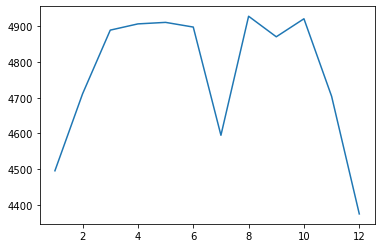

In [51]:
plt.plot(month_average['traffic_volume'])
plt.show()

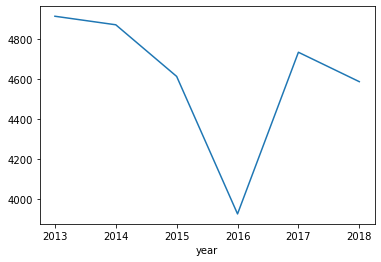

In [56]:
only_july = traffic_day[traffic_day['month']==7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

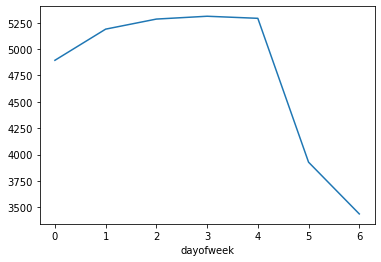

In [58]:
traffic_day.groupby('dayofweek').mean()['traffic_volume'].plot.line()
plt.show()

# Time Analysis III

Analyze the traffic volume over the hours in the day. From the plot above we see that the weekend will draw the average down so we need to split the data into business day and weekends

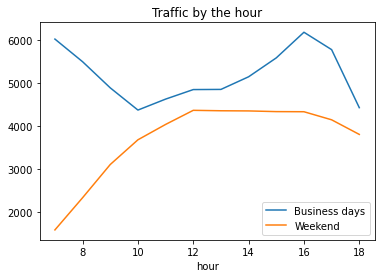

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


In [69]:
traffic_day[traffic_day['dayofweek']<=4].groupby('hour').mean()['traffic_volume'].plot.line(label='Business days')
traffic_day[traffic_day['dayofweek']>=5].groupby('hour').mean()['traffic_volume'].plot.line(label= 'Weekend')
plt.title('Traffic by the hour')
plt.legend()
plt.show()
print(by_hour_business)

# Weather Considerations
Lets see the correlations of the weather information provided to the traffic volume

In [70]:
traffic_day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day,month,year,dayofweek
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,2,10,2012,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,2,10,2012,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,2,10,2012,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,2,10,2012,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,2,10,2012,1


In [75]:
traffic_day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
day              -0.011063
month            -0.022337
year             -0.003557
dayofweek        -0.416453
Name: traffic_volume, dtype: float64